### Tutorial paper used as a refresher for FMCW basics [Signal Processing for TDM MIMO FMCW Millimeter-Wave Radar Sensors](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9658500)

## Importing Libraries

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import FluidID_configuration_1024 as cfg

%matplotlib notebook

### FMCW Radar Configuration Parameters

In [153]:
# Radar Configuration parameters
Nt = cfg.NUM_TX
Nr = cfg.NUM_RX
Nc = cfg.LOOPS_PER_FRAME
Ns = cfg.ADC_SAMPLES
fc = cfg.START_FREQ*1e9
Fs = cfg.SAMPLE_RATE*1e3
S = cfg.FREQ_SLOPE * 1e12
Tc = (cfg.IDLE_TIME + cfg.RAMP_END_TIME)*1e-6
c = 3e8

### Assuming FMCW chirp gets reflected from an object at $x (meters)$  away

In [154]:
t_d = (2*2) / c # time delay for object at 2m
freq = np.linspace(0,Fs,Ns)

### Imposing a linear decaying amplitude $A(f)$ on the reflected signal which we term as frequency response

In [155]:
alpha = (6e6 - freq) * (1e-6)

<IPython.core.display.Javascript object>


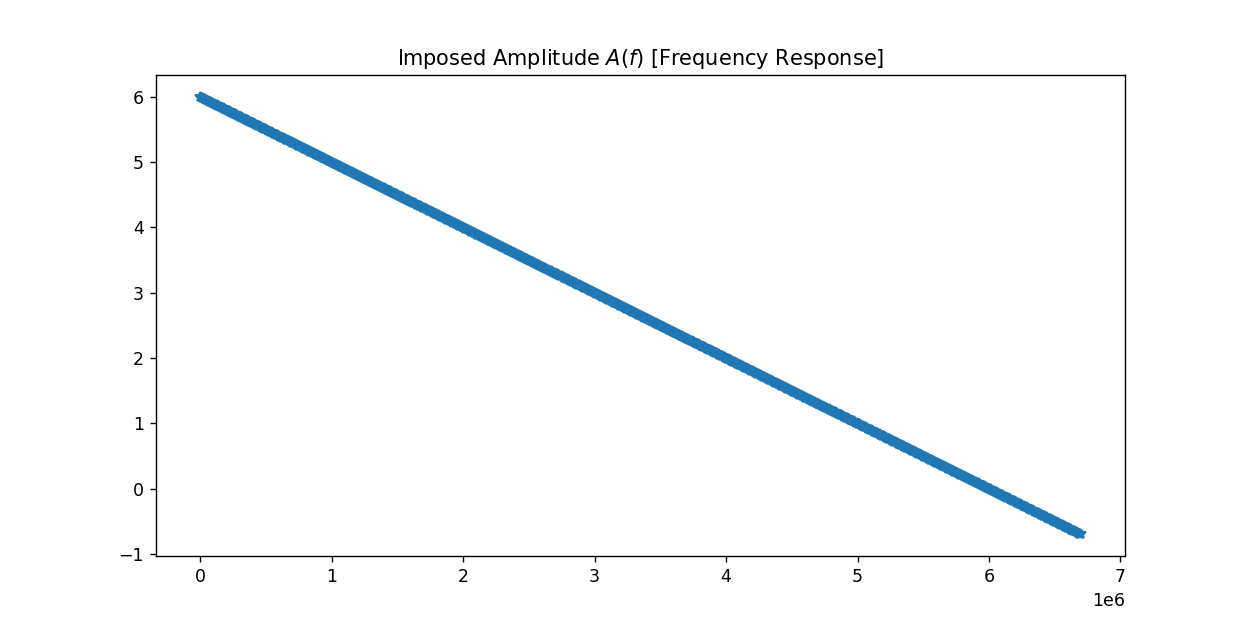

In [156]:
plt.figure(1,figsize=(10,5))
plt.plot(freq,alpha,"*-.")
plt.title('Imposed Amplitude $A(f)$ [Frequency Response]')
plt.show()

### Generating Mixed/Dechirped Signal $x_{IF} (n)$ 

In [157]:
f_IF = S*t_d # Continuous frequency
phi_IF = 2*np.pi*fc*t_d # phase

w_IF = 2*np.pi*f_IF/Fs # digital frequency
n = np.arange(0,Ns,1)

x_IF = alpha * np.exp(1j * phi_IF) * np.exp(1j*n*w_IF)

<IPython.core.display.Javascript object>


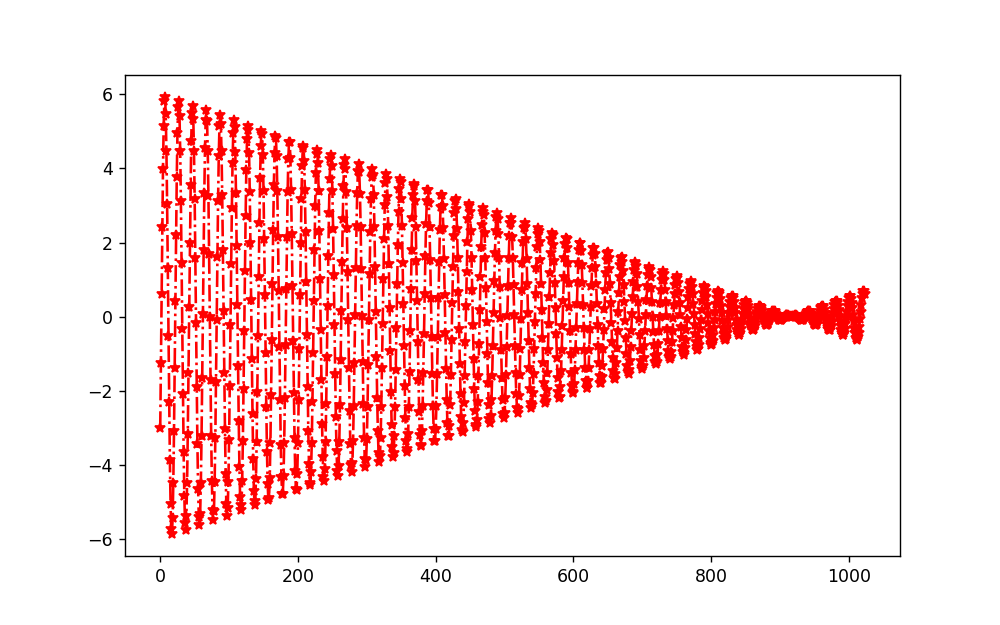

In [158]:
plt.figure(2,figsize=(8,5))
plt.plot(np.real(x_IF),"r*-.")
plt.show()

### Estimating the imposed amplitude using windowed max pooling, let us call that estimated frequency response as $\hat{A}(f)$

<IPython.core.display.Javascript object>


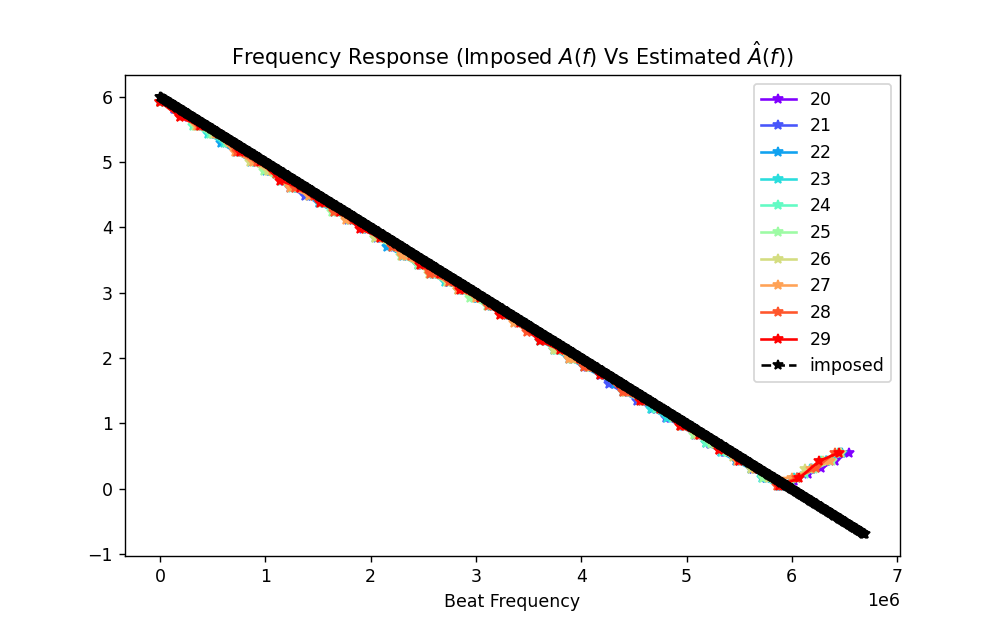

In [161]:
win_len = np.arange(20,30)
# win_len = np.array([4,8,16,32,64])

X_IF_real = np.real(x_IF)

color = plt.cm.rainbow(np.linspace(0,1,len(win_len)))

plt.figure(3,figsize=(8,5))

# Estimate frequency response
for win,clr in zip(win_len,color):
    gap = np.fix(Fs/(Ns/win)).astype(int)
    peak = list()
    for i in range(np.fix(Ns/win).astype(int)):
        peak.append(np.amax(X_IF_real[i*win:(i+1)*win]))
    freq_new = np.arange(0,Fs-gap+1,gap)
    plt.plot(freq_new, peak,c=clr, marker="*")

# Actual frequency response
freq = np.arange(0,Fs,Fs/Ns)
plt.plot(freq, alpha,"k*--")

leg  =list(map(str, win_len))
leg.append("imposed")

plt.xlabel("Beat Frequency")
plt.title("Frequency Response (Imposed $A(f)$ Vs Estimated $\hat{A}(f)$)")


plt.show()
plt.legend(leg)

### Estimate DFT of signal $\Re{(x_{IF} (n))}$ and let call it $X_{IF}(\omega_{k})$

<IPython.core.display.Javascript object>


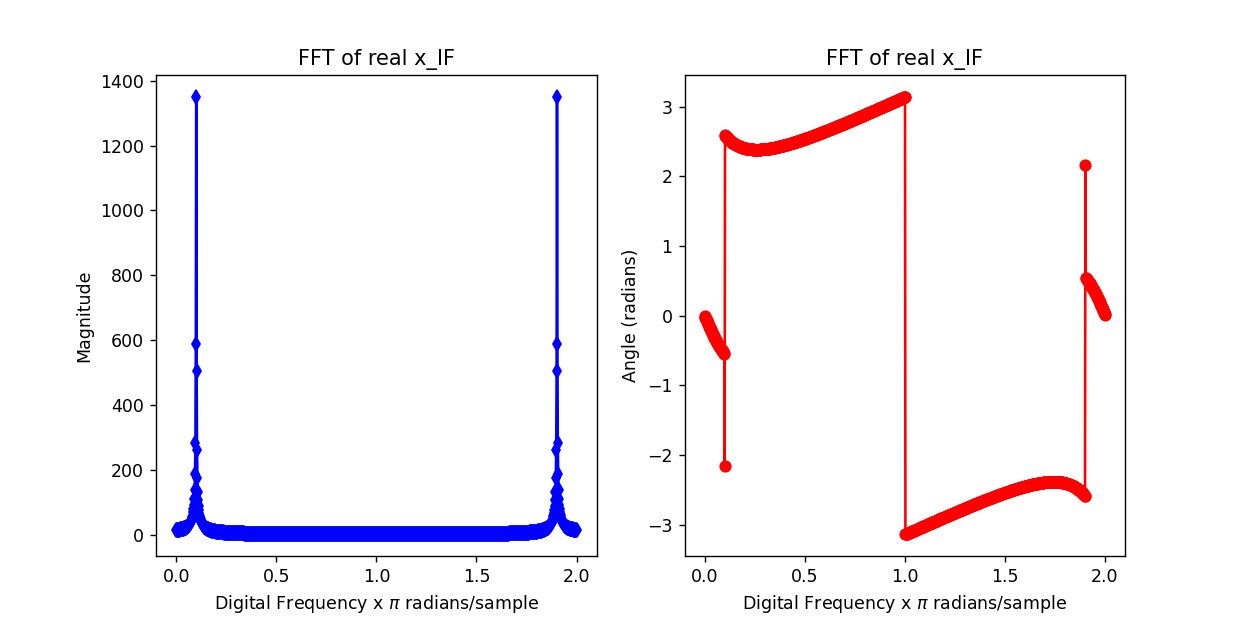

In [162]:
# Take DFT of the dechirped (mixed) signal
X_IF = np.fft.fft(X_IF_real,Ns)
freq = np.linspace(0,Fs,Ns) * 2/Fs

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(freq,np.abs(X_IF),"bd-")
plt.xlabel('Digital Frequency x $\pi$ radians/sample')
plt.ylabel('Magnitude')
plt.title('FFT of real x_IF')

plt.subplot(122)
plt.plot(freq,np.angle(X_IF),"ro-")
plt.xlabel('Digital Frequency x $\pi$ radians/sample')
plt.ylabel('Angle (radians)')
plt.title('FFT of real x_IF')

plt.show()